In [1]:
import pandas as pd
import numpy as np

from utils import SimulateData

from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns

# SSRT by SSD

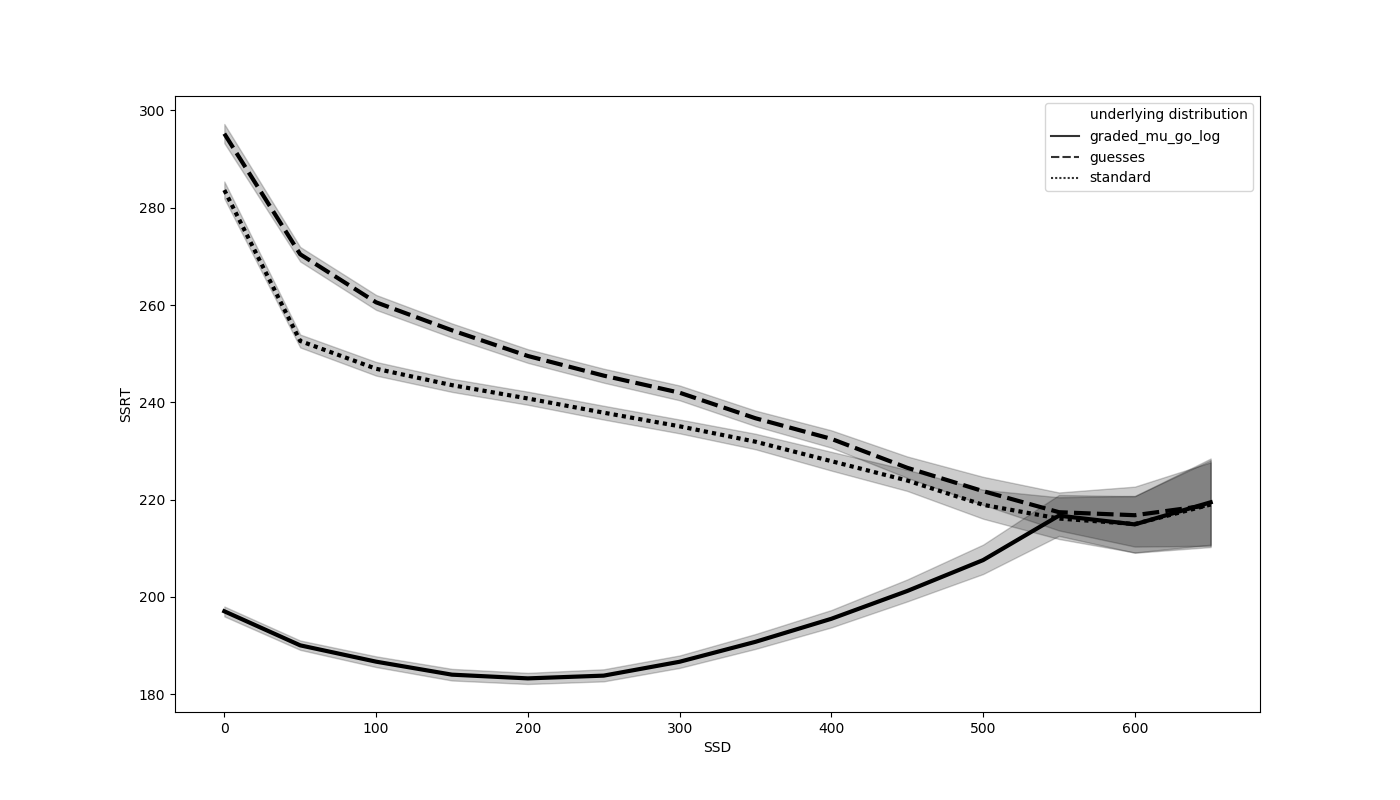

In [2]:
Image('figures/SSRT_by_SSD.png')

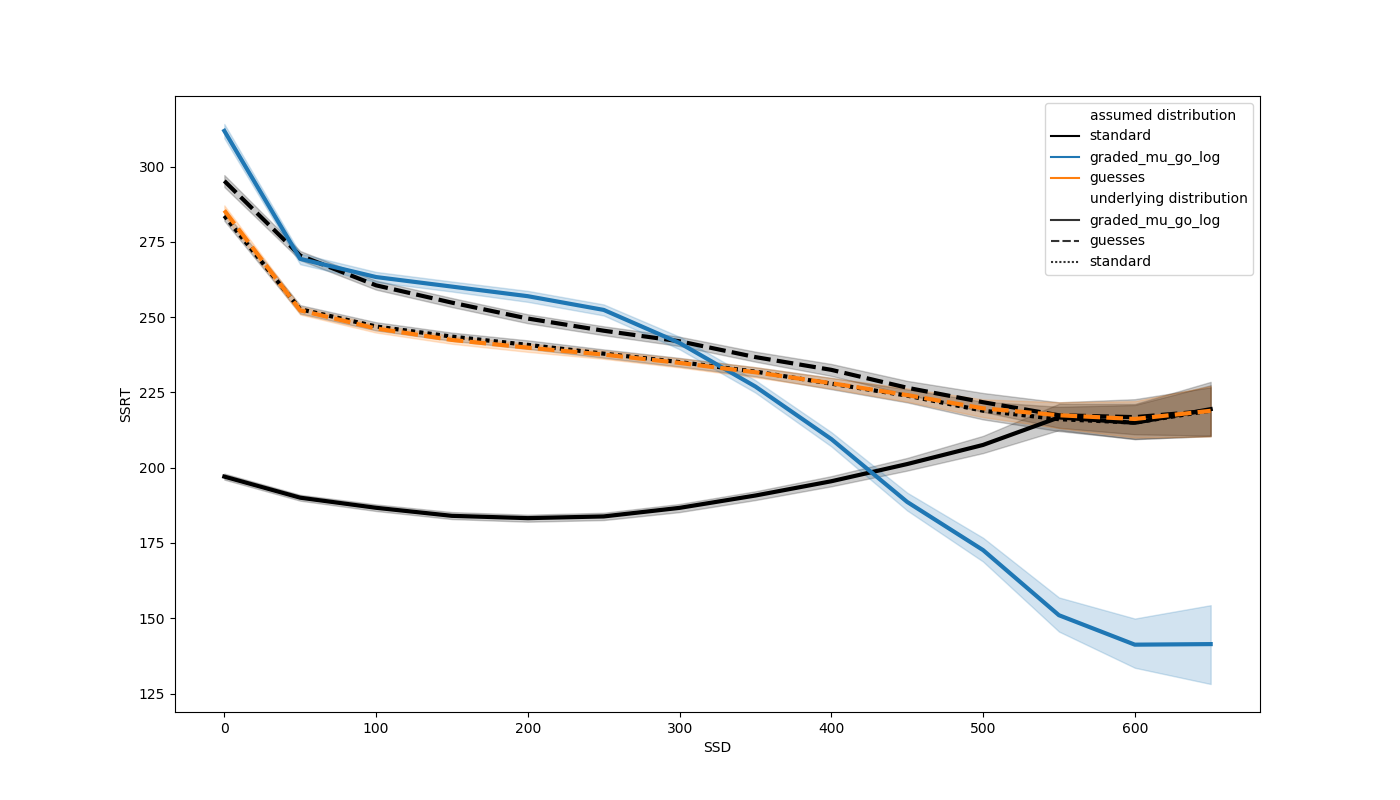

In [3]:
Image('figures/SSRT_by_SSD_supplement.png')

# Inhibition Function

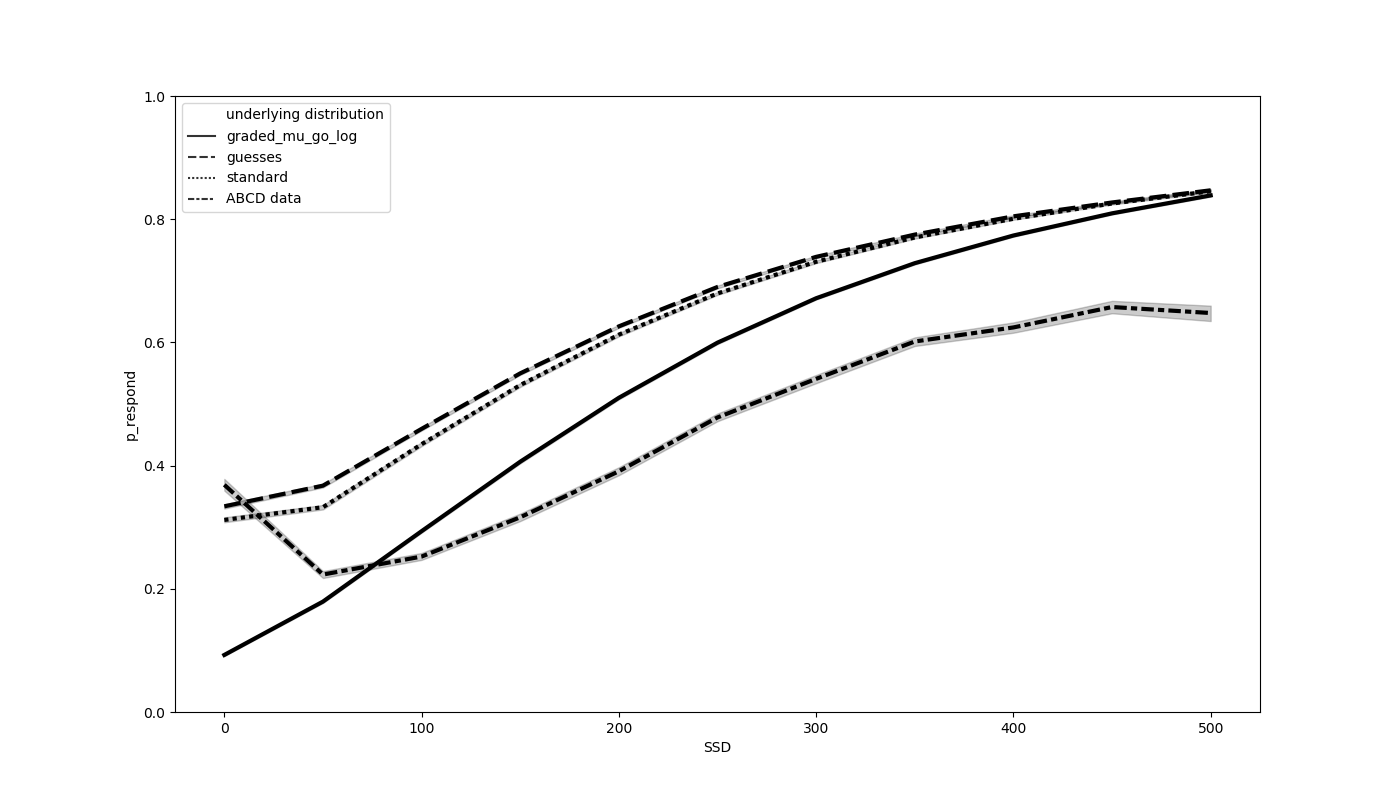

In [4]:
Image('figures/inhibition_function.png')

# Individual Differences

In [5]:
df = pd.read_csv('ssrt_metrics/expected_ssrts.csv', index_col=0)

# reformatting - was multiindex
df.columns = [ f'gen-{gen}_SSRT-{ssrt}' for gen, ssrt in zip(df.loc['underlying distribution', :].values, df.columns)]
df = df.drop(['underlying distribution', 'NARGUID'])

for col in df.columns:
    df[col] = df[col].astype(float)


In [6]:
df.corr(method='spearman')

,gen-graded_mu_go_log_SSRT-standard,gen-guesses_SSRT-standard.1,gen-standard_SSRT-standard.2,gen-graded_mu_go_log_SSRT-guesses,gen-guesses_SSRT-guesses.1,gen-standard_SSRT-guesses.2,gen-graded_mu_go_log_SSRT-graded_mu_go_log,gen-guesses_SSRT-graded_mu_go_log.1,gen-standard_SSRT-graded_mu_go_log.2
gen-graded_mu_go_log_SSRT-standard,1.000000,0.950028,0.900076,0.976042,0.887079,0.781700,0.443181,0.440902,0.357444
gen-guesses_SSRT-standard.1,0.950028,1.000000,0.948271,0.941952,0.957276,0.848241,0.578244,0.589140,0.503060
gen-standard_SSRT-standard.2,0.900076,0.948271,1.000000,0.940500,0.977313,0.958121,0.719074,0.724994,0.659503
gen-graded_mu_go_log_SSRT-guesses,0.976042,0.941952,0.940500,1.000000,0.937450,0.873201,0.564895,0.560504,0.489963
gen-guesses_SSRT-guesses.1,0.887079,0.957276,0.977313,0.937450,1.000000,0.953178,0.739291,0.748481,0.682166
gen-standard_SSRT-guesses.2,0.781700,0.848241,0.958121,0.873201,0.953178,1.000000,0.837177,0.840372,0.801113
gen-graded_mu_go_log_SSRT-graded_mu_go_log,0.443181,0.578244,0.719074,0.564895,0.739291,0.837177,1.000000,0.995210,0.989468
gen-guesses_SSRT-graded_mu_go_log.1,0.440902,0.589140,0.724994,0.560504,0.748481,0.840372,0.995210,1.000000,0.991471
gen-standard_SSRT-graded_mu_go_log.2,0.357444,0.503060,0.659503,0.489963,0.682166,0.801113,0.989468,0.991471,1.000000


In [7]:
df.filter(regex='SSRT-standard').corr(method='spearman')

,gen-graded_mu_go_log_SSRT-standard,gen-guesses_SSRT-standard.1,gen-standard_SSRT-standard.2
gen-graded_mu_go_log_SSRT-standard,1.000000,0.950028,0.900076
gen-guesses_SSRT-standard.1,0.950028,1.000000,0.948271
gen-standard_SSRT-standard.2,0.900076,0.948271,1.000000


# Plot graded Mu Go function

In [8]:
SSDs = np.arange(0,650, 5)

simulator = SimulateData()
mu_gos = [[i, simulator._log_mu_go(1, i)] for i in SSDs]

/Users/henrymj/Documents/ABCD_simulations/utils.py:281: RuntimeWarning: divide by zero encountered in log
  return self._at_least_0((np.log(SSD/max_SSD)/4+1) * mu_go)


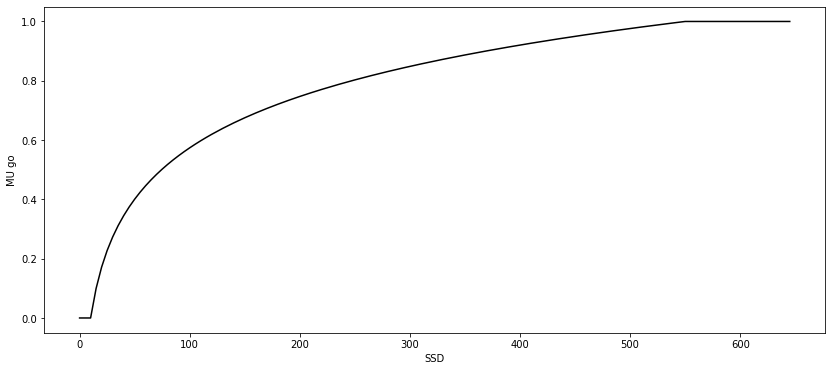

In [9]:
fig,ax = plt.subplots(1,1, figsize=(14, 6))

_ = sns.lineplot(x='SSD', y='MU go', color='k', data=pd.DataFrame(mu_gos, columns=['SSD', 'MU go']))
plt.savefig('figures/graded_mu_go_function.png')